In [0]:
#import_libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import csv
from sklearn.linear_model import LinearRegression
from sklearn.cross_decomposition import PLSRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn import ensemble
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.kernel_ridge import KernelRidge
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C
from sklearn.gaussian_process.kernels import DotProduct, WhiteKernel
from sklearn.gaussian_process.kernels import DotProduct, WhiteKernel, Matern
from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import MLPRegressor
from sklearn import preprocessing
from numpy import arange,array,ones
from scipy import stats
from sklearn import svm
from sklearn.svm import SVR
from scipy.interpolate import *
import statistics as st
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import csv
import pathlib
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error
from numpy import arange,array,ones
from scipy import stats
from scipy.interpolate import *
import statistics as st
from sklearn import svm
from sklearn.svm import SVR
import xgboost as xgb
###############################


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [4]:
#please mention data file name here
filename ='/content/drive/My Drive/Colab Notebooks/GaBP2/BandGapTable/data.csv' 
dataset = pd.read_csv(filename)
### check if any data is missing
dataset.isna().sum() 
### remove the line with missing data if any 
dataset = dataset.dropna()
#Remove the column with only text  and target column in X_1 by using their header
X_1 = dataset.drop(['BandGap','compound'], axis=1)
#X_1 = dataset[['vand_rad2','paulielctrneg2','Volume','Second_IE12','ST']]
#X_1 = dataset[['vand_rad2','paulielctrneg2','Volume','Second_IE12','ST','KT','CP','thermal_con1','spec_heat1','metling1','heat_fus1','elctron_AF3','density1','AM1','cov_rad3','First_IE3','Allen_electneg3']]
#X_1 = dataset[['vand_rad2','paulielctrneg2','Volume','ST','thermal_con1','metling1','heat_fus1','elctron_AF3','density1','AM1','cov_rad3','First_IE3','Allen_electneg3']]
#X_1.to_csv('training_X.csv')
#X_New_1 = pd.read_csv('Without_Band_Gap.csv')
#X_new=pd.read_csv('data_normalize.csv')
#X_norm=pd.DataFrame(preprocessing.scale(X_new))
#X_norm.to_csv('normalized_data.csv')


#X_1 = dataset['vand_rad2','paulielctrneg2','Volume']
#mention the column header of target here
Y = dataset['BandGap']
X = preprocessing.scale(X_1)
#X=X_1
#print(X)
print(X_1.columns.values.tolist()) 
print(len(X_1.columns.values.tolist())) 

['vand_rad2', 'paulielctrneg2', 'volume', 'second_IE2', 'ST', 'KT', 'CP', 'thermal_con1', 'spec_heat1', 'metling1', 'heat_fus1', 'elctron_AF3', 'density1', 'AM1', 'cov_rad3', 'First_IE3', 'Allen_electneg3', 'paulielctrneg1  ', 'Second_IE1']
19


In [5]:
dataset.keys()

Index(['compound', 'vand_rad2', 'paulielctrneg2', 'volume', 'second_IE2', 'ST',
       'KT', 'CP', 'thermal_con1', 'spec_heat1', 'metling1', 'heat_fus1',
       'elctron_AF3', 'density1', 'AM1', 'cov_rad3', 'First_IE3',
       'Allen_electneg3', 'paulielctrneg1  ', 'Second_IE1', 'BandGap'],
      dtype='object')

In [0]:
testing_data_fraction=0.30
EPOCHS = 1000
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)
def model_ann():
       model = keras.Sequential([
       layers.Dense(50, activation=tf.nn.relu, input_shape=[len(X_1.columns.values.tolist())]),
       layers.Dense(50, activation=tf.nn.sigmoid),
       layers.Dense(50, activation=tf.nn.sigmoid),
#       layers.Dense(100, activation=tf.nn.sigmoid),
       layers.Dense(1)])

       optimizer = tf.keras.optimizers.RMSprop(0.001)

       model.compile(loss='mean_squared_error',
                optimizer=optimizer,
                metrics=['mean_absolute_error', 'mean_squared_error'])
       return model

for n in range (1,200,1):

    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = testing_data_fraction, random_state=55)

##################################################################################################
## ## model Here
################################################################################################
##Tensorflow ann model here


#model = model_ann()
#    model = model_ann()
#    model.fit(X_train, Y_train, epochs=EPOCHS, validation_split = testing_data_fraction, verbose=0, callbacks=[early_stop])
#####################################################################################################
###other models here
#    model = LinearRegression(fit_intercept=True)
#    model = SVR(gamma='scale', C=8.0, epsilon=0.001)
#    model = PLSRegression(n_components=5)

#    model = Ridge(alpha=0.0000001, max_iter=10000, tol=0.001)

#    model = Lasso(alpha=0.00001,max_iter=100000)

#    model = KernelRidge(kernel='polynomial', alpha=0.000001, degree= 2)
#    model = KernelRidge(kernel='rbf', gamma=0.000011, alpha=0.000001)
#    model = GradientBoostingRegressor(n_estimators=500, max_depth = 10, learning_rate=0.01)

#    kernel = C(1.0, (1e-3, 1e3)) * RBF(10, (1e-2, 1e2))
#    model = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=9)
#    model = GradientBoostingRegressor(n_estimators=1000, max_depth = 4, learning_rate=0.01)
    model = RandomForestRegressor(n_estimators=1000, max_features=2,max_depth=8)
#    model = xgb.XGBRegressor(objective="reg:linear")
#    model = SVR(gamma='scale', C=8.0, epsilon=0.001)
###ANN with scikit-learn
    #model=MLPRegressor(activation='logistic',solver='adam',hidden_layer_sizes=(1000,),max_iter=1000,random_state=4) 

    model.fit(X_train, Y_train)
    
####################################################################################################
### ## model evaluation for training set
    y_train_predict = model.predict(X_train)
    rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
    r2 = r2_score(Y_train, y_train_predict)
    y_test_predict = model.predict(X_test)
    rmse_test = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
    r2_test = r2_score(Y_test, y_test_predict)
####################################################################################################
# print 
# print '%s' %n, '{}'.format(rmse) ,'{}'.format(r2), '{}'.format(rmse_test), '{}'.format(r2_test)
    


##########################################################################################################
### ## write output in a file named out.csv in same directory
### ## here we import the out.csv file and print the statistics
##write output in a file named out.csv in same directory
    with open('out.csv', mode='a') as out_file:
      out_writer = csv.writer(out_file, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)      
      out_writer.writerow(['%s' %n, '{}'.format(rmse) ,'{}'.format(r2), '{}'.format(rmse_test), '{}'.format(r2_test)])
      out_file.close()

from shutil import copyfile
copyfile('out.csv', 'cross-validation-out.csv')
########################################################################################################################
###here we import the out.csv file and printthe statistics

   
data_stat=pd.read_csv('out.csv',  names = ["RMSE-Train", "R^square train", "RMSE-test", "R^square test"])  
print(data_stat.describe())
data_stat.describe().to_csv("stat-results.csv")
#Removing out.csv file
try:
    os.remove("out.csv")
except OSError:
    pass


       RMSE-Train  R^square train   RMSE-test  R^square test
count  199.000000      199.000000  199.000000     199.000000
mean     0.225953        0.959902    0.567821       0.870982
std      0.004225        0.001497    0.010321       0.004682
min      0.213273        0.956095    0.538424       0.860571
25%      0.223195        0.959024    0.559997       0.867291
50%      0.226079        0.959871    0.567408       0.871212
75%      0.228452        0.960888    0.575981       0.874554
max      0.236475        0.964288    0.590385       0.884033


 **This section of the script is for an individual random state **

In [0]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = testing_data_fraction, random_state=100)

#print(X_train.shape, Y_train.shape)
#print(X_test.shape, Y_test.shape)

##########################################################################################################
#####Define the regression model here
 
model = model
model.fit(X_train, Y_train)

##### model evaluation for training set
y_train_predict = model.predict(X_train)
rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
r2 = r2_score(Y_train, y_train_predict)
print("The model performance for training set")
print("--------------------------------------")
print('RMSE of Training is {}'.format(rmse))
print('R2 score of Training set is {}'.format(r2))
#####################################################
# model evaluation for testing set
y_test_predict = model.predict(X_test)
rmse_test = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
r2_test = r2_score(Y_test, y_test_predict)
print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is Testing is {}'.format(rmse_test))
print('R2 score of Testing is {}'.format(r2_test))
#print (Y_test,y_test_predict)
####################################################################################
X_New= pd.read_csv('/content/drive/My Drive/Code_Verifacation/X-new.csv')
print(X_New['Compound'])
#X_New = X_new[['vand_rad2','paulielctrneg2','Volume','Second_IE12','ST','KT','CP','thermal_con1','spec_heat1','metling1','heat_fus1','elctron_AF3','density1','AM1','cov_rad3','First_IE3','Allen_electneg3']]
X_New = X_New.drop(['Compound'], axis=1)
#X_New = preprocessing.scale(X_New)
y_New = model.predict(X_New)
print( np.vstack(y_New))


The model performance for training set
--------------------------------------
RMSE of Training is 0.20133312805312892
R2 score of Training set is 0.9738058954985079
The model performance for testing set
--------------------------------------
RMSE is Testing is 0.47412682633884357
R2 score of Testing is 0.8579981513139956
0      B Al N2
1       B GaN2
2      B In N2
3      B Al P2
4      B Ga P2
5      B In P2
6     B Al As2
7      B GaAs2
8     B In As2
9     B Al Sb2
10     B GaSb2
11    B In Sb2
12     Al B N2
13     Ga B N2
14     In B N2
15    Al B As2
16    Ga B As2
17    In B As2
18     Al B P2
19      Ga BP2
20     In B P2
21    Al B Sb2
22    Ga B Sb2
23    In B Sb2
Name: Compound, dtype: object
[[1.38253917]
 [1.38253917]
 [1.38253917]
 [1.38253917]
 [1.38253917]
 [1.38253917]
 [1.38253917]
 [1.38253917]
 [1.38253917]
 [1.38253917]
 [1.38253917]
 [1.38253917]
 [1.38253917]
 [1.25318917]
 [1.25318917]
 [1.38253917]
 [1.25318917]
 [1.25318917]
 [1.38253917]
 [1.25318917]
 [1.253

In [0]:
######printing coefficient of the regression
print(np.vstack(X_1.columns.values.tolist()))
print("-----------------------------------------------")
print("-----------------------------------------------")

try:
    print ("The Dual coefficients are", np.vstack(model.dual_coef_))     
except AttributeError:
    pass
try:
    print ("The model coefficients are {}", np.vstack(model.coef_))
except AttributeError:
    pass
try:
    print ("The model coefficients are", np.vstack(model.feature_importances_))
except AttributeError:
    pass

[['vand_rad2']
 ['paulielctrneg2']
 ['volume']
 ['second_IE2']
 ['ST']
 ['KT']
 ['CP']
 ['thermal_con1']
 ['spec_heat1']
 ['metling1']
 ['heat_fus1']
 ['elctron_AF3']
 ['density1']
 ['AM1']
 ['cov_rad3']
 ['First_IE3']
 ['Allen_electneg3']
 ['paulielctrneg1  ']
 ['Second_IE1']]
-----------------------------------------------
-----------------------------------------------
The model coefficients are [[0.05924375]
 [0.06020245]
 [0.18118625]
 [0.06496066]
 [0.02801903]
 [0.02036056]
 [0.01382276]
 [0.0347699 ]
 [0.03642251]
 [0.03183705]
 [0.03016786]
 [0.08400389]
 [0.02749172]
 [0.03093188]
 [0.07851608]
 [0.08237641]
 [0.08461168]
 [0.03329031]
 [0.01778525]]


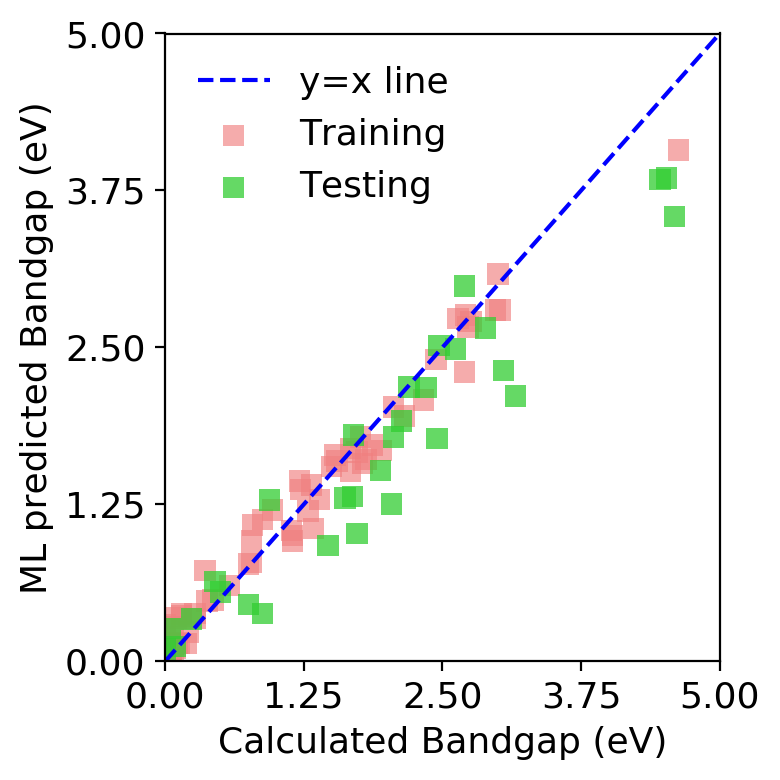

<Figure size 432x288 with 0 Axes>

In [0]:
#### define your data plot here       
plt.figure(figsize=(4,4),dpi=200)
plt.title('', fontsize=13)
plt.xlim((0,5))
plt.xticks(np.linspace(0,5,5,endpoint=True))
plt.ylim((0,5))
plt.yticks(np.linspace(0,5,5,endpoint=True))
plt.tick_params(axis='both', which='major', labelsize=13)
#plt.scatter(Y_train, y_train_predict, label='Training',facecolors='green',alpha=0.8, edgecolors='none',s=60,marker='s')
#plt.scatter(Y_test, y_test_predict, label='Testing',facecolors='blue',alpha=0.75, edgecolors='none',s=60, marker='s')
plt.scatter(Y_train, y_train_predict, label='Training',facecolors='lightcoral',alpha=0.65, edgecolors='none',s=60,marker='s')
plt.scatter(Y_test, y_test_predict, label='Testing',facecolors='limegreen',alpha=0.75, edgecolors='none',s=60, marker='s')
#plt.xlabel("$E_{ads}$ RPA calculated (eV)",fontsize=13)
#plt.ylabel("$E_{ads}$ ML predicted (eV)",fontsize=13)

#####fitting with a y=x line here (polynomial approach)
#p1 = np.polyfit(Y_train, y_train_predict,1)
plt.xlabel("Calculated Bandgap (eV)",fontsize=13)
plt.ylabel("ML predicted Bandgap (eV)",fontsize=13)

#####fitting with a y=x line here (polynomial approach)
plt.plot((0,5),(0,5), 'b',linestyle='dashed',label='y=x line')

plt.legend(loc=2, prop={'size': 13}, frameon=False)
#error=round(rmse_test,2)
#plt.text(2.5, 1.5, 'RMSE={}'.format(error), fontsize=13)
plt.tight_layout()
plt.show()
plt.savefig ('RFR.png')